###GRUPO 2:###

Alumnos:

- Benitez Altamirano, Bernie Hans

- Diaz Cabrera, Alexander Gabriel

- Morales Ccasa, Geyson David

- Ramirez Ucañay, Barbarita Paula Janeth

- Siu Siu Ting, Aldo Daniel

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [ ]:
# Crear directorios necesarios
!mkdir -p /content/opt/cocoapi/

# Clonar el repositorio de COCO API
!git clone https://github.com/cocodataset/cocoapi.git

# Cambiar al directorio de PythonAPI y compilar
%cd opt/cocoapi/PythonAPI
!make

# Añadir la ruta de PythonAPI a sys.path
import sys
sys.path.append('/content/cocoapi/PythonAPI')

# Verificar la importación
from pycocotools.coco import COCO


Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975 (from 1)
Receiving objects: 100% (975/975), 11.72 MiB | 28.31 MiB/s, done.
Resolving deltas: 100% (576/576), done.
[Errno 2] No such file or directory: 'opt/cocoapi/PythonAPI'
/content
make: *** No targets specified and no makefile found.  Stop.


In [ ]:
# Clonar el repositorio
!git clone https://github.com/tatwan/image-captioning-pytorch.git

# Crear la carpeta PythonAPI si no existe y copiar los archivos .py
!mkdir -p /content/cocoapi/PythonAPI
!cp image-captioning-pytorch/*.py /content/cocoapi/PythonAPI/

# Verificar que los archivos .py se copiaron correctamente
!ls /content/cocoapi/PythonAPI/


Cloning into 'image-captioning-pytorch'...
remote: Enumerating objects: 37, done.
remote: Total 37 (delta 0), reused 0 (delta 0), pack-reused 37 (from 1)
Receiving objects: 100% (37/37), 126.61 MiB | 51.16 MiB/s, done.
data_loader.py	model.py	  pycocoEvalDemo.ipynb	setup.py
Makefile	pycocoDemo.ipynb  pycocotools		vocabulary.py


In [ ]:
# Crear el directorio de imágenes si no existe
!mkdir -p /content/opt/cocoapi/images/train2014

# Descargar las imágenes de train2014
!wget http://images.cocodataset.org/zips/train2014.zip -P /content/opt/cocoapi/images/

# Descomprimir el archivo zip
!unzip /content/opt/cocoapi/images/train2014.zip -d /content/opt/cocoapi/images/


Se truncaron las últimas líneas 5000 del resultado de transmisión.
 extracting: /content/opt/cocoapi/images/train2014/COCO_train2014_000000408557.jpg  
 extracting: /content/opt/cocoapi/images/train2014/COCO_train2014_000000013714.jpg  
 extracting: /content/opt/cocoapi/images/train2014/COCO_train2014_000000194043.jpg  
 extracting: /content/opt/cocoapi/images/train2014/COCO_train2014_000000219859.jpg  
 extracting: /content/opt/cocoapi/images/train2014/COCO_train2014_000000278135.jpg  
 extracting: /content/opt/cocoapi/images/train2014/COCO_train2014_000000141015.jpg  
 extracting: /content/opt/cocoapi/images/train2014/COCO_train2014_000000280923.jpg  
 extracting: /content/opt/cocoapi/images/train2014/COCO_train2014_000000200024.jpg  
 extracting: /content/opt/cocoapi/images/train2014/COCO_train2014_000000435713.jpg  
 extracting: /content/opt/cocoapi/images/train2014/COCO_train2014_000000249993.jpg  
 extracting: /content/opt/cocoapi/images/train2014/COCO_train2014_000000424160.jpg 

In [ ]:
# Descargar las anotaciones de COCO
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

# Descomprimir las anotaciones
!unzip annotations_trainval2014.zip -d /content/opt/cocoapi/

# Eliminar el archivo zip
!rm annotations_trainval2014.zip


--2024-10-19 05:15:46--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.192.113, 3.5.28.55, 54.231.230.33, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.192.113|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  96.6MB/s    in 2.5s    

2024-10-19 05:15:48 (96.6 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]

Archive:  annotations_trainval2014.zip
  inflating: /content/opt/cocoapi/annotations/instances_train2014.json  
  inflating: /content/opt/cocoapi/annotations/instances_val2014.json  
  inflating: /content/opt/cocoapi/annotations/person_keypoints_train2014.json  
  inflating: /content/opt/cocoapi/annotations/person_keypoints_val2014.json  
  inflating: /content/opt/cocoapi/annotations/caption

In [ ]:
!ls /content/opt/cocoapi/annotations/


captions_train2014.json  instances_train2014.json  person_keypoints_train2014.json
captions_val2014.json	 instances_val2014.json    person_keypoints_val2014.json


In [ ]:
import os
from pycocotools.coco import COCO

# Directorio de datos y tipo
dataDir = '/content/opt/cocoapi/annotations/'  # Ajustar la ruta correcta
dataType = 'val2014'

# Ruta a las anotaciones de instancias
instances_annFile = os.path.join(dataDir, 'instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# Ruta a las anotaciones de captions
captions_annFile = os.path.join(dataDir, 'captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# Obtener ids de imágenes
ids = list(coco.anns.keys())
print(f"Total image ids: {len(ids)}")


loading annotations into memory...
Done (t=5.11s)
creating index...
index created!
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!
Total image ids: 291875


In [ ]:
list(coco.anns.values())[0]

{'segmentation': [[239.97,
   260.24,
   222.04,
   270.49,
   199.84,
   253.41,
   213.5,
   227.79,
   259.62,
   200.46,
   274.13,
   202.17,
   277.55,
   210.71,
   249.37,
   253.41,
   237.41,
   264.51,
   242.54,
   261.95,
   228.87,
   271.34]],
 'area': 2765.1486500000005,
 'iscrowd': 0,
 'image_id': 558840,
 'bbox': [199.84, 200.46, 77.71, 70.88],
 'category_id': 58,
 'id': 156}

## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000502963.jpg


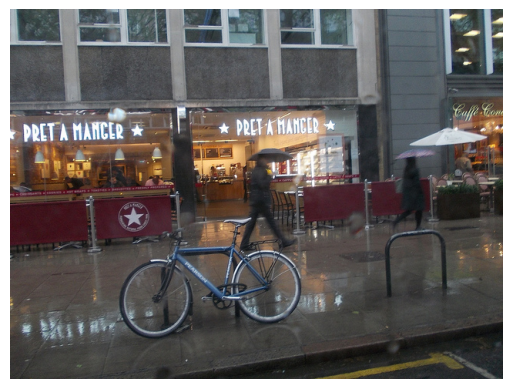

People walking next to a cafe in the rain
A bike parked on the side of a city street.
Some people that are walking on a sidewalk while it is raining.
Bicycle parked in front of a restaurant with outdoor tables and a wide sidewalk.
A bicycle is parked on a sidewalk as people walk by.


In [ ]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)

# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will learn how to load and pre-process data from the [COCO dataset](http://cocodataset.org/#home). You will also design a CNN-RNN model for automatically generating image captions.

Note that **any amendments that you make to this notebook will not be graded**.  However, you will use the instructions provided in **Step 3** and **Step 4** to implement your own CNN encoder and RNN decoder by making amendments to the **models.py** file provided as part of this project.  Your **models.py** file **will be graded**.

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Explore the Data Loader
- [Step 2](#step2): Use the Data Loader to Obtain Batches
- [Step 3](#step3): Experiment with the CNN Encoder
- [Step 4](#step4): Implement the RNN Decoder

<a id='step1'></a>
## Step 1: Explore the Data Loader

We have already written a [data loader](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) that you can use to load the COCO dataset in batches.

In the code cell below, you will initialize the data loader by using the `get_loader` function in **data_loader.py**.  

> For this project, you are not permitted to change the **data_loader.py** file, which must be used as-is.

The `get_loader` function takes as input a number of arguments that can be explored in **data_loader.py**.  Take the time to explore these arguments now by opening **data_loader.py** in a new window.  Most of the arguments must be left at their default values, and you are only allowed to amend the values of the arguments below:
1. **`transform`** - an [image transform](http://pytorch.org/docs/master/torchvision/transforms.html) specifying how to pre-process the images and convert them to PyTorch tensors before using them as input to the CNN encoder.  For now, you are encouraged to keep the transform as provided in `transform_train`.  You will have the opportunity later to choose your own image transform to pre-process the COCO images.
2. **`mode`** - one of `'train'` (loads the training data in batches) or `'test'` (for the test data). We will say that the data loader is in training or test mode, respectively.  While following the instructions in this notebook, please keep the data loader in training mode by setting `mode='train'`.
3. **`batch_size`** - determines the batch size.  When training the model, this is number of image-caption pairs used to amend the model weights in each training step.
4. **`vocab_threshold`** - the total number of times that a word must appear in the in the training captions before it is used as part of the vocabulary.  Words that have fewer than `vocab_threshold` occurrences in the training captions are considered unknown words.
5. **`vocab_from_file`** - a Boolean that decides whether to load the vocabulary from file.  

We will describe the `vocab_threshold` and `vocab_from_file` arguments in more detail soon.  For now, run the code cell below.  Be patient - it may take a couple of minutes to run!

In [ ]:
!pip install pycocotools

In [ ]:
import sys
sys.path.append('/content/opt/cocoapi/PythonAPI')
!pip install nltk
import nltk
nltk.download('punkt')
from data_loader import get_loader
from torchvision import transforms
from pycocotools.coco import COCO

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Define a transform to pre-process the training images.
transform_train = transforms.Compose([
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Set the minimum word count threshold.
vocab_threshold = 5

# Specify the batch size.
batch_size = 10

# Obtain the data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=False,
                         cocoapi_loc='/content/opt')

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=0.64s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:40<00:00, 10142.77it/s]


In [ ]:
# data_loader.dataset.caption_lengths

When you ran the code cell above, the data loader was stored in the variable `data_loader`.  

You can access the corresponding dataset as `data_loader.dataset`.  This dataset is an instance of the `CoCoDataset` class in **data_loader.py**.  If you are unfamiliar with data loaders and datasets, you are encouraged to review [this PyTorch tutorial](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html).

### Exploring the `__getitem__` Method

The `__getitem__` method in the `CoCoDataset` class determines how an image-caption pair is pre-processed before being incorporated into a batch.  This is true for all `Dataset` classes in PyTorch; if this is unfamiliar to you, please review [the tutorial linked above](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html).

When the data loader is in training mode, this method begins by first obtaining the filename (`path`) of a training image and its corresponding caption (`caption`).

#### Image Pre-Processing

Image pre-processing is relatively straightforward (from the `__getitem__` method in the `CoCoDataset` class):
```python
# Convert image to tensor and pre-process using transform
image = Image.open(os.path.join(self.img_folder, path)).convert('RGB')
image = self.transform(image)
```
After loading the image in the training folder with name `path`, the image is pre-processed using the same transform (`transform_train`) that was supplied when instantiating the data loader.  

#### Caption Pre-Processing

The captions also need to be pre-processed and prepped for training. In this example, for generating captions, we are aiming to create a model that predicts the next token of a sentence from previous tokens, so we turn the caption associated with any image into a list of tokenized words, before casting it to a PyTorch tensor that we can use to train the network.

To understand in more detail how COCO captions are pre-processed, we'll first need to take a look at the `vocab` instance variable of the `CoCoDataset` class.  The code snippet below is pulled from the `__init__` method of the `CoCoDataset` class:
```python
def __init__(self, transform, mode, batch_size, vocab_threshold, vocab_file, start_word,
        end_word, unk_word, annotations_file, vocab_from_file, img_folder):
        ...
        self.vocab = Vocabulary(vocab_threshold, vocab_file, start_word,
            end_word, unk_word, annotations_file, vocab_from_file)
        ...
```
From the code snippet above, you can see that `data_loader.dataset.vocab` is an instance of the `Vocabulary` class from **vocabulary.py**.  Take the time now to verify this for yourself by looking at the full code in **data_loader.py**.  

We use this instance to pre-process the COCO captions (from the `__getitem__` method in the `CoCoDataset` class):

```python
# Convert caption to tensor of word ids.
tokens = nltk.tokenize.word_tokenize(str(caption).lower())   # line 1
caption = []                                                 # line 2
caption.append(self.vocab(self.vocab.start_word))            # line 3
caption.extend([self.vocab(token) for token in tokens])      # line 4
caption.append(self.vocab(self.vocab.end_word))              # line 5
caption = torch.Tensor(caption).long()                       # line 6
```

As you will see soon, this code converts any string-valued caption to a list of integers, before casting it to a PyTorch tensor.  To see how this code works, we'll apply it to the sample caption in the next code cell.

In [ ]:
sample_caption = 'A person doing a trick on a rail while riding a skateboard.'

In **`line 1`** of the code snippet, every letter in the caption is converted to lowercase, and the [`nltk.tokenize.word_tokenize`](http://www.nltk.org/) function is used to obtain a list of string-valued tokens.  Run the next code cell to visualize the effect on `sample_caption`.

In [ ]:
import nltk

sample_tokens = nltk.tokenize.word_tokenize(str(sample_caption).lower())
print(sample_tokens)

['a', 'person', 'doing', 'a', 'trick', 'on', 'a', 'rail', 'while', 'riding', 'a', 'skateboard', '.']


In **`line 2`** and **`line 3`** we initialize an empty list and append an integer to mark the start of a caption.  The [paper](https://arxiv.org/pdf/1411.4555.pdf) that you are encouraged to implement uses a special start word (and a special end word, which we'll examine below) to mark the beginning (and end) of a caption.

This special start word (`"<start>"`) is decided when instantiating the data loader and is passed as a parameter (`start_word`).  You are **required** to keep this parameter at its default value (`start_word="<start>"`).

As you will see below, the integer `0` is always used to mark the start of a caption.

In [ ]:
sample_caption = []

start_word = data_loader.dataset.vocab.start_word
print('Special start word:', start_word)
sample_caption.append(data_loader.dataset.vocab(start_word))
print(sample_caption)

Special start word: <start>
[0]


In **`line 4`**, we continue the list by adding integers that correspond to each of the tokens in the caption.

In [ ]:
# a = 'I enjoy playing football and run around'
# b = nltk.tokenize.word_tokenize(str(a).lower())
# [data_loader.dataset.vocab(t) for t in b]

In [ ]:
sample_caption.extend([data_loader.dataset.vocab(token) for token in sample_tokens])
print(sample_caption)

[0, 3, 98, 754, 3, 396, 39, 3, 1010, 207, 139, 3, 753, 18]


In **`line 5`**, we append a final integer to mark the end of the caption.  

Identical to the case of the special start word (above), the special end word (`"<end>"`) is decided when instantiating the data loader and is passed as a parameter (`end_word`).  You are **required** to keep this parameter at its default value (`end_word="<end>"`).

As you will see below, the integer `1` is always used to  mark the end of a caption.

In [ ]:
end_word = data_loader.dataset.vocab.end_word
print('Special end word:', end_word)

sample_caption.append(data_loader.dataset.vocab(end_word))
print(sample_caption)

Special end word: <end>
[0, 3, 98, 754, 3, 396, 39, 3, 1010, 207, 139, 3, 753, 18, 1]


Finally, in **`line 6`**, we convert the list of integers to a PyTorch tensor and cast it to [long type](http://pytorch.org/docs/master/tensors.html#torch.Tensor.long).  You can read more about the different types of PyTorch tensors on the [website](http://pytorch.org/docs/master/tensors.html).

In [ ]:
import torch

sample_caption = torch.Tensor(sample_caption).long()
print(sample_caption)

tensor([   0,    3,   98,  754,    3,  396,   39,    3, 1010,  207,  139,    3,
         753,   18,    1])


And that's it!  In summary, any caption is converted to a list of tokens, with _special_ start and end tokens marking the beginning and end of the sentence:
```
[<start>, 'a', 'person', 'doing', 'a', 'trick', 'while', 'riding', 'a', 'skateboard', '.', <end>]
```
This list of tokens is then turned into a list of integers, where every distinct word in the vocabulary has an associated integer value:
```
[0, 3, 98, 754, 3, 396, 207, 139, 3, 753, 18, 1]
```
Finally, this list is converted to a PyTorch tensor.  All of the captions in the COCO dataset are pre-processed using this same procedure from **`lines 1-6`** described above.  

As you saw, in order to convert a token to its corresponding integer, we call `data_loader.dataset.vocab` as a function.  The details of how this call works can be explored in the `__call__` method in the `Vocabulary` class in **vocabulary.py**.  

```python
def __call__(self, word):
    if not word in self.word2idx:
        return self.word2idx[self.unk_word]
    return self.word2idx[word]
```

The `word2idx` instance variable is a Python [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) that is indexed by string-valued keys (mostly tokens obtained from training captions).  For each key, the corresponding value is the integer that the token is mapped to in the pre-processing step.

Use the code cell below to view a subset of this dictionary.

In [ ]:
# Preview the word2idx dictionary.
dict(list(data_loader.dataset.vocab.word2idx.items())[:10])

{'<start>': 0,
 '<end>': 1,
 '<unk>': 2,
 'a': 3,
 'very': 4,
 'clean': 5,
 'and': 6,
 'well': 7,
 'decorated': 8,
 'empty': 9}

We also print the total number of keys.

In [ ]:
# Print the total number of keys in the word2idx dictionary.
print('Total number of tokens in vocabulary:', len(data_loader.dataset.vocab))

Total number of tokens in vocabulary: 8852


As you will see if you examine the code in **vocabulary.py**, the `word2idx` dictionary is created by looping over the captions in the training dataset.  If a token appears no less than `vocab_threshold` times in the training set, then it is added as a key to the dictionary and assigned a corresponding unique integer.  You will have the option later to amend the `vocab_threshold` argument when instantiating your data loader.  Note that in general, **smaller** values for `vocab_threshold` yield a **larger** number of tokens in the vocabulary.  You are encouraged to check this for yourself in the next code cell by decreasing the value of `vocab_threshold` before creating a new data loader.  

In [ ]:
# Modify the minimum word count threshold.
vocab_threshold = 4

# Obtain the data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=False,
                         cocoapi_loc='/content/opt')

loading annotations into memory...
Done (t=0.63s)
creating index...
index created!
[0/414113] Tokenizing captions...
[100000/414113] Tokenizing captions...
[200000/414113] Tokenizing captions...
[300000/414113] Tokenizing captions...
[400000/414113] Tokenizing captions...
loading annotations into memory...
Done (t=0.61s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:41<00:00, 10055.89it/s]


In [ ]:
# Print the total number of keys in the word2idx dictionary.
print('Total number of tokens in vocabulary:', len(data_loader.dataset.vocab))

Total number of tokens in vocabulary: 9947


There are also a few special keys in the `word2idx` dictionary.  You are already familiar with the special start word (`"<start>"`) and special end word (`"<end>"`).  There is one more special token, corresponding to unknown words (`"<unk>"`).  All tokens that don't appear anywhere in the `word2idx` dictionary are considered unknown words.  In the pre-processing step, any unknown tokens are mapped to the integer `2`.

In [ ]:
unk_word = data_loader.dataset.vocab.unk_word
print('Special unknown word:', unk_word)

print('All unknown words are mapped to this integer:', data_loader.dataset.vocab(unk_word))

Special unknown word: <unk>
All unknown words are mapped to this integer: 2


Check this for yourself below, by pre-processing the provided nonsense words that never appear in the training captions.

In [ ]:
print(data_loader.dataset.vocab('jfkafejw'))
print(data_loader.dataset.vocab('ieowoqjf'))

2
2


The final thing to mention is the `vocab_from_file` argument that is supplied when creating a data loader.  To understand this argument, note that when you create a new data loader, the vocabulary (`data_loader.dataset.vocab`) is saved as a [pickle](https://docs.python.org/3/library/pickle.html) file in the project folder, with filename `vocab.pkl`.

If you are still tweaking the value of the `vocab_threshold` argument, you **must** set `vocab_from_file=False` to have your changes take effect.  

But once you are happy with the value that you have chosen for the `vocab_threshold` argument, you need only run the data loader *one more time* with your chosen `vocab_threshold` to save the new vocabulary to file.  Then, you can henceforth set `vocab_from_file=True` to load the vocabulary from file and speed the instantiation of the data loader.  Note that building the vocabulary from scratch is the most time-consuming part of instantiating the data loader, and so you are strongly encouraged to set `vocab_from_file=True` as soon as you are able.

Note that if `vocab_from_file=True`, then any supplied argument for `vocab_threshold` when instantiating the data loader is completely ignored.

In [ ]:
# Obtain the data loader (from file). Note that it runs much faster than before!
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_from_file=True,
                         cocoapi_loc='/content/opt')

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.60s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:40<00:00, 10273.12it/s]


In the next section, you will learn how to use the data loader to obtain batches of training data.

<a id='step2'></a>
## Step 2: Use the Data Loader to Obtain Batches

The captions in the dataset vary greatly in length.  You can see this by examining `data_loader.dataset.caption_lengths`, a Python list with one entry for each training caption (where the value stores the length of the corresponding caption).  

In the code cell below, we use this list to print the total number of captions in the training data with each length.  As you will see below, the majority of captions have length 10.  Likewise, very short and very long captions are quite rare.  

In [ ]:
from collections import Counter

# Tally the total number of training captions with each length.
counter = Counter(data_loader.dataset.caption_lengths)
lengths = sorted(counter.items(), key=lambda pair: pair[1], reverse=True)
for value, count in lengths:
    print('value: %2d --- count: %5d' % (value, count))

value: 10 --- count: 86302
value: 11 --- count: 79971
value:  9 --- count: 71920
value: 12 --- count: 57653
value: 13 --- count: 37668
value: 14 --- count: 22342
value:  8 --- count: 20742
value: 15 --- count: 12839
value: 16 --- count:  7736
value: 17 --- count:  4845
value: 18 --- count:  3101
value: 19 --- count:  2017
value:  7 --- count:  1594
value: 20 --- count:  1453
value: 21 --- count:   997
value: 22 --- count:   683
value: 23 --- count:   534
value: 24 --- count:   384
value: 25 --- count:   277
value: 26 --- count:   214
value: 27 --- count:   160
value: 28 --- count:   114
value: 29 --- count:    87
value: 30 --- count:    58
value: 31 --- count:    49
value: 32 --- count:    44
value: 34 --- count:    40
value: 37 --- count:    32
value: 35 --- count:    31
value: 33 --- count:    30
value: 36 --- count:    26
value: 38 --- count:    18
value: 39 --- count:    18
value: 43 --- count:    16
value: 44 --- count:    16
value: 48 --- count:    12
value: 45 --- count:    11
v

To generate batches of training data, we begin by first sampling a caption length (where the probability that any length is drawn is proportional to the number of captions with that length in the dataset).  Then, we retrieve a batch of size `batch_size` of image-caption pairs, where all captions have the sampled length.  This approach for assembling batches matches the procedure in [this paper](https://arxiv.org/pdf/1502.03044.pdf) and has been shown to be computationally efficient without degrading performance.

Run the code cell below to generate a batch.  The `get_train_indices` method in the `CoCoDataset` class first samples a caption length, and then samples `batch_size` indices corresponding to training data points with captions of that length.  These indices are stored below in `indices`.

These indices are supplied to the data loader, which then is used to retrieve the corresponding data points.  The pre-processed images and captions in the batch are stored in `images` and `captions`.

In [ ]:
import numpy as np
import torch.utils.data as data

# Randomly sample a caption length, and sample indices with that length.
indices = data_loader.dataset.get_train_indices()
print('sampled indices:', indices)

# Create and assign a batch sampler to retrieve a batch with the sampled indices.
new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
data_loader.batch_sampler.sampler = new_sampler

# Obtain the batch.
images, captions = next(iter(data_loader))

print('images.shape:', images.shape)
print('captions.shape:', captions.shape)

# (Optional) Uncomment the lines of code below to print the pre-processed images and captions.
# print('images:', images)
# print('captions:', captions)

sampled indices: [64389, 199285, 200691, 227868, 170745, 206475, 361687, 115107, 88645, 140621]
images.shape: torch.Size([10, 3, 224, 224])
captions.shape: torch.Size([10, 10])


Each time you run the code cell above, a different caption length is sampled, and a different batch of training data is returned.  Run the code cell multiple times to check this out!

You will train your model in the next notebook in this sequence (**2_Training.ipynb**). This code for generating training batches will be provided to you.

> Before moving to the next notebook in the sequence (**2_Training.ipynb**), you are strongly encouraged to take the time to become very familiar with the code in  **data_loader.py** and **vocabulary.py**.  **Step 1** and **Step 2** of this notebook are designed to help facilitate a basic introduction and guide your understanding.  However, our description is not exhaustive, and it is up to you (as part of the project) to learn how to best utilize these files to complete the project.  __You should NOT amend any of the code in either *data_loader.py* or *vocabulary.py*.__

In the next steps, we focus on learning how to specify a CNN-RNN architecture in PyTorch, towards the goal of image captioning.

<a id='step3'></a>
## Step 3: Experiment with the CNN Encoder

Run the code cell below to import `EncoderCNN` and `DecoderRNN` from **model.py**.

In [ ]:
# Watch for any changes in model.py, and re-load it automatically.
#% load_ext autoreload
#% autoreload 2

# Import EncoderCNN and DecoderRNN.
from model import EncoderCNN, DecoderRNN

In the next code cell we define a `device` that you will use move PyTorch tensors to GPU (if CUDA is available).  Run this code cell before continuing.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
device

device(type='cuda')

Run the code cell below to instantiate the CNN encoder in `encoder`.  

The pre-processed images from the batch in **Step 2** of this notebook are then passed through the encoder, and the output is stored in `features`.

In [ ]:
images[0].shape

torch.Size([3, 224, 224])

In [ ]:
# Specify the dimensionality of the image embedding.
embed_size = 256

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Initialize the encoder. (Optional: Add additional arguments if necessary.)
encoder = EncoderCNN(embed_size)

# Move the encoder to GPU if CUDA is available.
encoder.to(device)

# Move last batch of images (from Step 2) to GPU if CUDA is available.
images = images.to(device)

# Pass the images through the encoder.
features = encoder(images)

print('type(features):', type(features))
print('features.shape:', features.shape)

# Check that your encoder satisfies some requirements of the project! :D
assert type(features)==torch.Tensor, "Encoder output needs to be a PyTorch Tensor."
assert (features.shape[0]==batch_size) & (features.shape[1]==embed_size), "The shape of the encoder output is incorrect."

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 201MB/s]


type(features): <class 'torch.Tensor'>
features.shape: torch.Size([10, 256])


In [ ]:
features[0].shape

torch.Size([256])

The encoder that we provide to you uses the pre-trained ResNet-50 architecture (with the final fully-connected layer removed) to extract features from a batch of pre-processed images.  The output is then flattened to a vector, before being passed through a `Linear` layer to transform the feature vector to have the same size as the word embedding.

![Encoder](images/encoder.png)

You are welcome (and encouraged) to amend the encoder in **model.py**, to experiment with other architectures.  In particular, consider using a [different pre-trained model architecture](http://pytorch.org/docs/master/torchvision/models.html).  You may also like to [add batch normalization](http://pytorch.org/docs/master/nn.html#normalization-layers).  

> You are **not** required to change anything about the encoder.

For this project, you **must** incorporate a pre-trained CNN into your encoder.  Your `EncoderCNN` class must take `embed_size` as an input argument, which will also correspond to the dimensionality of the input to the RNN decoder that you will implement in Step 4.  When you train your model in the next notebook in this sequence (**2_Training.ipynb**), you are welcome to tweak the value of `embed_size`.

If you decide to modify the `EncoderCNN` class, save **model.py** and re-execute the code cell above.  If the code cell returns an assertion error, then please follow the instructions to modify your code before proceeding.  The assert statements ensure that `features` is a PyTorch tensor with shape `[batch_size, embed_size]`.

<a id='step4'></a>
## Step 4: Implement the RNN Decoder

Before executing the next code cell, you must write `__init__` and `forward` methods in the `DecoderRNN` class in **model.py**.  (Do **not** write the `sample` method yet - you will work with this method when you reach **3_Inference.ipynb**.)

> The `__init__` and `forward` methods in the `DecoderRNN` class are the only things that you **need** to modify as part of this notebook.  You will write more implementations in the notebooks that appear later in the sequence.

Your decoder will be an instance of the `DecoderRNN` class and must accept as input:
- the PyTorch tensor `features` containing the embedded image features (outputted in Step 3, when the last batch of images from Step 2 was passed through `encoder`), along with
- a PyTorch tensor corresponding to the last batch of captions (`captions`) from Step 2.

Note that the way we have written the data loader should simplify your code a bit.  In particular, every training batch will contain pre-processed captions where all have the same length (`captions.shape[1]`), so **you do not need to worry about padding**.  
> While you are encouraged to implement the decoder described in [this paper](https://arxiv.org/pdf/1411.4555.pdf), you are welcome to implement any architecture of your choosing, as long as it uses at least one RNN layer, with hidden dimension `hidden_size`.  

Although you will test the decoder using the last batch that is currently stored in the notebook, your decoder should be written to accept an arbitrary batch (of embedded image features and pre-processed captions [where all captions have the same length]) as input.  

![Decoder](images/decoder.png)

In the code cell below, `outputs` should be a PyTorch tensor with size `[batch_size, captions.shape[1], vocab_size]`.  Your output should be designed such that `outputs[i,j,k]` contains the model's predicted score, indicating how likely the `j`-th token in the `i`-th caption in the batch is the `k`-th token in the vocabulary.  In the next notebook of the sequence (**2_Training.ipynb**), we provide code to supply these scores to the [`torch.nn.CrossEntropyLoss`](http://pytorch.org/docs/master/nn.html#torch.nn.CrossEntropyLoss) optimizer in PyTorch.

In [ ]:
from model import EncoderCNN, DecoderRNN

In [ ]:
# Specify the number of features in the hidden state of the RNN decoder.
hidden_size = 512

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Store the size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the decoder.
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move the decoder to GPU if CUDA is available.
decoder.to(device)

# Move last batch of captions (from Step 1) to GPU if CUDA is available
captions = captions.to(device)

# Pass the encoder output and captions through the decoder.
outputs = decoder(features, captions)

print('type(outputs):', type(outputs))
print('outputs.shape:', outputs.shape)

# Check that your decoder satisfies some requirements of the project! :D
assert type(outputs)==torch.Tensor, "Decoder output needs to be a PyTorch Tensor."
assert (outputs.shape[0]==batch_size) & (outputs.shape[1]==captions.shape[1]) & (outputs.shape[2]==vocab_size), "The shape of the decoder output is incorrect."

type(outputs): <class 'torch.Tensor'>
outputs.shape: torch.Size([10, 10, 9947])


When you train your model in the next notebook in this sequence (**2_Training.ipynb**), you are welcome to tweak the value of `hidden_size`.

# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will train your CNN-RNN model.  

You are welcome and encouraged to try out many different architectures and hyperparameters when searching for a good model.

This does have the potential to make the project quite messy!  Before submitting your project, make sure that you clean up:
- the code you write in this notebook.  The notebook should describe how to train a single CNN-RNN architecture, corresponding to your final choice of hyperparameters.  You should structure the notebook so that the reviewer can replicate your results by running the code in this notebook.  
- the output of the code cell in **Step 2**.  The output should show the output obtained when training the model from scratch.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Training Setup
- [Step 2](#step2): Train your Model
- [Step 3](#step3): (Optional) Validate your Model

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
import sys
sys.path.append('/content/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from model import EncoderCNN, DecoderRNN
import math


## Select appropriate values for the Python variables below.
batch_size = 1750          # batch size
vocab_threshold = 4        # minimum word count threshold
vocab_from_file = True      # if True, load existing vocab file
embed_size = 256           # dimensionality of image and word embeddings
hidden_size = 512          # number of features in hidden state of the RNN decoder
num_epochs = 3             # number of training epochs
save_every = 1             # determines frequency of saving model weights
print_every = 5          # determines window for printing average loss
log_file = 'training_log.txt'       # name of file with saved training loss and perplexity

# (Optional)  Amend the image transform below.
transform_train = transforms.Compose([
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Build data loader.
data_loader = get_loader(transform=transform_train,
                         mode='train',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=vocab_from_file,
                         cocoapi_loc='/content/opt')

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder.
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Move models to GPU if CUDA is available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
decoder.to(device)

# Define the loss function.
criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()

# Specify the learnable parameters of the model.
params = list(decoder.parameters())+list(encoder.embed.parameters())

# Define the optimizer.
optimizer = torch.optim.Adam(params,lr=0.03)

# Set the total number of training steps per epoch.
total_step = math.ceil(len(data_loader.dataset.caption_lengths) / data_loader.batch_sampler.batch_size)

Vocabulary successfully loaded from vocab.pkl file!
loading annotations into memory...
Done (t=0.62s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 414113/414113 [00:40<00:00, 10196.59it/s]


<a id='step2'></a>
## Step 2: Train your Model

Once you have executed the code cell in **Step 1**, the training procedure below should run without issue.  

It is completely fine to leave the code cell below as-is without modifications to train your model.  However, if you would like to modify the code used to train the model below, you must ensure that your changes are easily parsed by your reviewer.  In other words, make sure to provide appropriate comments to describe how your code works!  

You may find it useful to load saved weights to resume training.  In that case, note the names of the files containing the encoder and decoder weights that you'd like to load (`encoder_file` and `decoder_file`).  Then you can load the weights by using the lines below:

```python
# Load pre-trained weights before resuming training.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))
```

While trying out parameters, make sure to take extensive notes and record the settings that you used in your various training runs.  In particular, you don't want to encounter a situation where you've trained a model for several hours but can't remember what settings you used :).

### A Note on Tuning Hyperparameters

To figure out how well your model is doing, you can look at how the training loss and perplexity evolve during training - and for the purposes of this project, you are encouraged to amend the hyperparameters based on this information.  

However, this will not tell you if your model is overfitting to the training data, and, unfortunately, overfitting is a problem that is commonly encountered when training image captioning models.  

For this project, you need not worry about overfitting. **This project does not have strict requirements regarding the performance of your model**, and you just need to demonstrate that your model has learned **_something_** when you generate captions on the test data.  For now, we strongly encourage you to train your model for the suggested 3 epochs without worrying about performance; then, you should immediately transition to the next notebook in the sequence (**3_Inference.ipynb**) to see how your model performs on the test data.  If your model needs to be changed, you can come back to this notebook, amend hyperparameters (if necessary), and re-train the model.

That said, if you would like to go above and beyond in this project, you can read about some approaches to minimizing overfitting in section 4.3.1 of [this paper](http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7505636).  In the next (optional) step of this notebook, we provide some guidance for assessing the performance on the validation dataset.

In [ ]:
import torch.utils.data as data
import numpy as np
import os
import time

# Open the training log file.
f = open(log_file, 'w')

# Inicializar el tiempo general para cada epoch
for epoch in range(1, num_epochs + 1):

    # Registrar el tiempo de inicio de la época
    epoch_start_time = time.time()
    step_start_time = time.time()

    for i_step in range(1, total_step + 1):

        # Randomly sample a caption length, and sample indices with that length.
        indices = data_loader.dataset.get_train_indices()

        # Create and assign a batch sampler to retrieve a batch with the sampled indices.
        new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        data_loader.batch_sampler.sampler = new_sampler

        # Obtain the batch.
        images, captions = next(iter(data_loader))

        # Move batch of images and captions to GPU if CUDA is available.
        images = images.to(device)
        captions = captions.to(device)

        # Zero the gradients.
        decoder.zero_grad()
        encoder.zero_grad()

        # Pass the inputs through the CNN-RNN model.
        features = encoder(images)
        outputs = decoder(features, captions)

        # Calculate the batch loss.
        loss = criterion(outputs.view(-1, vocab_size), captions.view(-1))

        # Backward pass.
        loss.backward()

        # Update the parameters in the optimizer.
        optimizer.step()

        # Calcular el tiempo tomado para el step
        step_end_time = time.time()
        step_duration = step_end_time - step_start_time

        # Get training statistics.
        stats = ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f, Perplexity: %5.4f, '
                 'Step Time: %.2fs' %
                 (epoch, num_epochs, i_step, total_step, loss.item(),
                  np.exp(loss.item()), step_duration))

        # Print training statistics (on same line).
        print('\r' + stats, end="")
        sys.stdout.flush()

        # Print training statistics to file.
        f.write(stats + '\n')
        f.flush()

        # Print training statistics (on different line).
        if i_step % print_every == 0:
            print('\r' + stats)
            step_start_time = time.time()

    # Calcular el tiempo tomado para la época
    epoch_end_time = time.time()
    epoch_duration = epoch_end_time - epoch_start_time

    # Mostrar el tiempo total de la época
    print(f'\nEpoch [{epoch}/{num_epochs}] completed in {epoch_duration:.2f} seconds.')

    # Guardar el tiempo de la época en el archivo
    f.write(f'Epoch [{epoch}/{num_epochs}] completed in {epoch_duration:.2f} seconds.\n')
    f.flush()

    # Create the 'models' directory if it doesn't exist
    if not os.path.exists('./models'):
        os.makedirs('./models')

    # Save the weights.
    if epoch % save_every == 0:
        torch.save(decoder.state_dict(), os.path.join('./models', 'decoder-%d.pkl' % epoch))
        torch.save(encoder.state_dict(), os.path.join('./models', 'encoder-%d.pkl' % epoch))

# Close the training log file.
f.close()

Epoch [1/3], Step [5/237], Loss: 2.9142, Perplexity: 18.4336, Step Time: 71.87s
Epoch [1/3], Step [10/237], Loss: 2.6420, Perplexity: 14.0407, Step Time: 71.15s
Epoch [1/3], Step [15/237], Loss: 2.6683, Perplexity: 14.4157, Step Time: 70.85s
Epoch [1/3], Step [20/237], Loss: 2.6824, Perplexity: 14.6203, Step Time: 68.24s
Epoch [1/3], Step [25/237], Loss: 2.5595, Perplexity: 12.9295, Step Time: 68.16s
Epoch [1/3], Step [30/237], Loss: 2.5760, Perplexity: 13.1442, Step Time: 68.21s
Epoch [1/3], Step [35/237], Loss: 2.5054, Perplexity: 12.2482, Step Time: 68.00s
Epoch [1/3], Step [40/237], Loss: 2.5148, Perplexity: 12.3647, Step Time: 68.36s
Epoch [1/3], Step [45/237], Loss: 2.6478, Perplexity: 14.1233, Step Time: 68.52s
Epoch [1/3], Step [50/237], Loss: 2.6231, Perplexity: 13.7788, Step Time: 68.36s
Epoch [1/3], Step [55/237], Loss: 2.6308, Perplexity: 13.8846, Step Time: 70.08s
Epoch [1/3], Step [60/237], Loss: 2.5915, Perplexity: 13.3504, Step Time: 71.46s
Epoch [1/3], Step [65/237], L

<a id='step3'></a>
## Step 3: (Optional) Validate your Model

To assess potential overfitting, one approach is to assess performance on a validation set.  If you decide to do this **optional** task, you are required to first complete all of the steps in the next notebook in the sequence (**3_Inference.ipynb**); as part of that notebook, you will write and test code (specifically, the `sample` method in the `DecoderRNN` class) that uses your RNN decoder to generate captions.  That code will prove incredibly useful here.

If you decide to validate your model, please do not edit the data loader in **data_loader.py**.  Instead, create a new file named **data_loader_val.py** containing the code for obtaining the data loader for the validation data.  You can access:
- the validation images at filepath `'/opt/cocoapi/images/train2014/'`, and
- the validation image caption annotation file at filepath `'/opt/cocoapi/annotations/captions_val2014.json'`.

The suggested approach to validating your model involves creating a json file such as [this one](https://github.com/cocodataset/cocoapi/blob/master/results/captions_val2014_fakecap_results.json) containing your model's predicted captions for the validation images.  Then, you can write your own script or use one that you [find online](https://github.com/tylin/coco-caption) to calculate the BLEU score of your model.  You can read more about the BLEU score, along with other evaluation metrics (such as TEOR and Cider) in section 4.1 of [this paper](https://arxiv.org/pdf/1411.4555.pdf).  For more information about how to use the annotation file, check out the [website](http://cocodataset.org/#download) for the COCO dataset.

# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will use your trained model to generate captions for images in the test dataset.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Get Data Loader for Test Dataset
- [Step 2](#step2): Load Trained Models
- [Step 3](#step3): Finish the Sampler
- [Step 4](#step4): Clean up Captions
- [Step 5](#step5): Generate Predictions!

<a id='step1'></a>
## Step 1: Get Data Loader for Test Dataset

Before running the code cell below, define the transform in `transform_test` that you would like to use to pre-process the test images.  

Make sure that the transform that you define here agrees with the transform that you used to pre-process the training images (in **2_Training.ipynb**).  For instance, if you normalized the training images, you should also apply the same normalization procedure to the test images.

In [ ]:
# Verificar si el archivo .zip está presente
!ls /content

# Extraer el archivo .zip en la carpeta correcta
!unzip /content/image_info_test2014.zip -d /content/opt/cocoapi/annotations/

cocoapi		    image-captioning-pytorch  models  __pycache__  training_log.txt
data_loader_val.py  image_info_test2014.zip   opt     sample_data  vocab.pkl
Archive:  /content/image_info_test2014.zip
replace /content/opt/cocoapi/annotations/annotations/image_info_test2014.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/opt/cocoapi/annotations/annotations/image_info_test2014.json  


In [ ]:
!ls /content/opt/cocoapi/annotations/

annotations		 instances_train2014.json	  person_keypoints_val2014.json
captions_train2014.json  instances_val2014.json
captions_val2014.json	 person_keypoints_train2014.json


In [ ]:
# Mover el archivo a la carpeta correcta
!mv /content/opt/cocoapi/annotations/annotations/image_info_test2014.json /content/opt/cocoapi/annotations/

In [ ]:
# Eliminar la carpeta 'annotations' dentro de 'annotations'
!rm -r /content/opt/cocoapi/annotations/annotations/

In [ ]:
# Listar los archivos dentro de la carpeta de anotaciones
!ls /content/opt/cocoapi/annotations/

captions_train2014.json   instances_train2014.json	   person_keypoints_val2014.json
captions_val2014.json	  instances_val2014.json
image_info_test2014.json  person_keypoints_train2014.json


In [ ]:
data_loader = get_loader(transform=transform_test,
                         mode='test',
                         cocoapi_loc='/content/opt')

Vocabulary successfully loaded from vocab.pkl file!


In [ ]:
# Descargar el archivo .zip con la información de las imágenes de prueba
!wget http://images.cocodataset.org/annotations/image_info_test2014.zip

# Crear la carpeta donde se colocarán las anotaciones si no existe
!mkdir -p /content/opt/cocoapi/annotations/

# Extraer el archivo .zip en la carpeta correcta
!unzip image_info_test2014.zip -d /content/opt/cocoapi/annotations/

--2024-10-19 13:21:50--  http://images.cocodataset.org/annotations/image_info_test2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.144.187, 52.216.131.155, 3.5.25.243, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.144.187|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 763464 (746K) [application/zip]
Saving to: ‘image_info_test2014.zip’

image_info_test2014 100%[===================>] 745.57K  4.23MB/s    in 0.2s    

2024-10-19 13:21:50 (4.23 MB/s) - ‘image_info_test2014.zip’ saved [763464/763464]

Archive:  image_info_test2014.zip
  inflating: /content/opt/cocoapi/annotations/annotations/image_info_test2014.json  


In [ ]:
import os
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from pycocotools.coco import COCO
import json
import pickle  # Added import for pickle

def get_loader(transform, mode='val', batch_size=1, vocab_threshold=None, vocab_file='./vocab.pkl',
               start_word="<start>", end_word="<end>", unk_word="<unk>", vocab_from_file=True, num_workers=0,
               cocoapi_loc=None): # Added cocoapi_loc
    """Returns the data loader.
    Args:
      transform: Image transform.
      mode: One of 'train' or 'test'.
      batch_size: Batch size (if in testing mode, must have batch_size=1).
      vocab_threshold: Minimum word count threshold.
      vocab_file: File containing the vocabulary.
      start_word: Special word denoting sentence start.
      end_word: Special word denoting sentence end.
      unk_word: Special word denoting unknown words.
      vocab_from_file: If False, create vocab from scratch & override any existing vocab_file.
                       If True, load vocab from from existing vocab_file, if it exists.
      num_workers: Number of subprocesses to use for data loading
      cocoapi_loc: The location of the COCO API (default: None) # Added cocoapi_loc description
    """

    assert mode in ['train', 'test', 'val'], "mode must be one of 'train', 'test' or 'val'."

    if vocab_from_file and os.path.exists(vocab_file):
        # If vocab_file exists, load data from json.
        with open(vocab_file, 'rb') as f:
            vocab = pickle.load(f)
    else:
        print(f"Building vocab from scratch {mode} data.")
        # Assuming build_vocab is defined elsewhere and takes appropriate arguments
        vocab = build_vocab(vocab_threshold, start_word, end_word, unk_word, annotations_file, vocab_file)  # Assuming annotations_file is defined somewhere


    # Based on mode (train, val, or test), obtain img_folder and annotations_file.
    if mode == 'train':
        if cocoapi_loc is None:
            img_folder = os.path.join(cocoapi_loc, 'images/train2014/')  # Indented this line
            annotations_file = os.path.join(cocoapi_loc, 'annotations/captions_train2014.json')  # Indented this line
        else:
            img_folder = os.path.join(cocoapi_loc, 'images/train2014/')  # Indented this line
            annotations_file = os.path.join(cocoapi_loc, 'annotations/captions_train2014.json')  # Indented this line
    elif mode == 'val':
        if cocoapi_loc is None:
            img_folder = os.path.join(cocoapi_loc, 'images/val2014/')
            annotations_file = os.path.join(cocoapi_loc, 'annotations/captions_val2014.json')
        else:
            img_folder = os.path.join(cocoapi_loc, 'images/val2014/')
            annotations_file = os.path.join(cocoapi_loc, 'annotations/captions_val2014.json')

In [ ]:
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
transform_test = transforms.Compose([
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader = get_loader(transform=transform_test,
                         mode='test',
                         cocoapi_loc='/content/opt')

Vocabulary successfully loaded from vocab.pkl file!


In [ ]:
!wget http://images.cocodataset.org/zips/test2014.zip

--2024-10-19 14:06:03--  http://images.cocodataset.org/zips/test2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.202.121, 3.5.7.174, 52.216.209.185, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.202.121|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6660437059 (6.2G) [application/zip]
Saving to: ‘test2014.zip’

test2014.zip        100%[===================>]   6.20G  53.1MB/s    in 2m 11s  

2024-10-19 14:08:14 (48.4 MB/s) - ‘test2014.zip’ saved [6660437059/6660437059]



In [ ]:
!unzip test2014.zip -d /content/opt/cocoapi/images/

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 extracting: /content/opt/cocoapi/images/test2014/COCO_test2014_000000112376.jpg  
 extracting: /content/opt/cocoapi/images/test2014/COCO_test2014_000000484597.jpg  
 extracting: /content/opt/cocoapi/images/test2014/COCO_test2014_000000135715.jpg  
 extracting: /content/opt/cocoapi/images/test2014/COCO_test2014_000000456549.jpg  
 extracting: /content/opt/cocoapi/images/test2014/COCO_test2014_000000188376.jpg  
 extracting: /content/opt/cocoapi/images/test2014/COCO_test2014_000000169328.jpg  
 extracting: /content/opt/cocoapi/images/test2014/COCO_test2014_000000015971.jpg  
 extracting: /content/opt/cocoapi/images/test2014/COCO_test2014_000000294000.jpg  
 extracting: /content/opt/cocoapi/images/test2014/COCO_test2014_000000481459.jpg  
 extracting: /content/opt/cocoapi/images/test2014/COCO_test2014_000000230069.jpg  
 extracting: /content/opt/cocoapi/images/test2014/COCO_test2014_000000394792.jpg  
 extracting: /conten

In [ ]:
!ls /content/opt/cocoapi/images/test2014/

COCO_test2014_000000000001.jpg	COCO_test2014_000000194307.jpg	COCO_test2014_000000389958.jpg
COCO_test2014_000000000014.jpg	COCO_test2014_000000194308.jpg	COCO_test2014_000000389991.jpg
COCO_test2014_000000000016.jpg	COCO_test2014_000000194349.jpg	COCO_test2014_000000390006.jpg
COCO_test2014_000000000027.jpg	COCO_test2014_000000194350.jpg	COCO_test2014_000000390045.jpg
COCO_test2014_000000000057.jpg	COCO_test2014_000000194383.jpg	COCO_test2014_000000390054.jpg
COCO_test2014_000000000063.jpg	COCO_test2014_000000194410.jpg	COCO_test2014_000000390060.jpg
COCO_test2014_000000000069.jpg	COCO_test2014_000000194446.jpg	COCO_test2014_000000390063.jpg
COCO_test2014_000000000080.jpg	COCO_test2014_000000194463.jpg	COCO_test2014_000000390064.jpg
COCO_test2014_000000000083.jpg	COCO_test2014_000000194468.jpg	COCO_test2014_000000390066.jpg
COCO_test2014_000000000090.jpg	COCO_test2014_000000194500.jpg	COCO_test2014_000000390082.jpg
COCO_test2014_000000000106.jpg	COCO_test2014_000000194503.jpg	COCO_tes

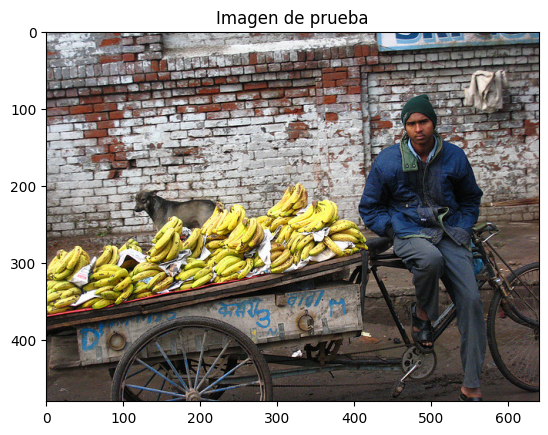

In [ ]:
# Obtener una imagen de prueba y procesarla
orig_image, image = next(iter(data_loader))

# Visualizar la imagen antes del preprocesamiento
plt.imshow(np.squeeze(orig_image))
plt.title('Imagen de prueba')
plt.show()

Run the code cell below to visualize an example test image, before pre-processing is applied.

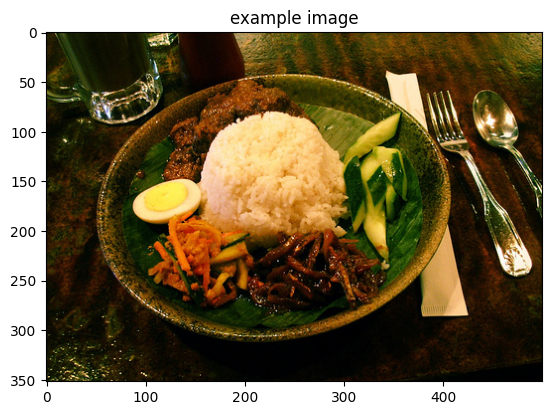

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

<a id='step2'></a>
## Step 2: Load Trained Models

In the next code cell we define a `device` that you will use move PyTorch tensors to GPU (if CUDA is available).  Run this code cell before continuing.

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Before running the code cell below, complete the following tasks.

### Task #1

In the next code cell, you will load the trained encoder and decoder from the previous notebook (**2_Training.ipynb**).  To accomplish this, you must specify the names of the saved encoder and decoder files in the `models/` folder (e.g., these names should be `encoder-5.pkl` and `decoder-5.pkl`, if you trained the model for 5 epochs and saved the weights after each epoch).  

### Task #2

Plug in both the embedding size and the size of the hidden layer of the decoder corresponding to the selected pickle file in `decoder_file`.

In [ ]:
import os
import torch
from model import EncoderCNN, DecoderRNN

# Selecciona el dispositivo, GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Especificar los modelos guardados que se deben cargar
encoder_file = 'encoder-3.pkl'
decoder_file = 'decoder-3.pkl'

# Definir los valores para las variables de Python a continuación
embed_size = 256
hidden_size = 512

# El tamaño del vocabulario
vocab_size = len(data_loader.dataset.vocab)

# Inicializar el encoder y el decoder, y ponerlos en modo de inferencia
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Cargar los pesos entrenados
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Mover los modelos a la GPU si está disponible
encoder.to(device)
decoder.to(device)

<ipython-input-120-ecfa46ec3da7>:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
<ipython-input

DecoderRNN(
  (word_embedding): Embedding(9947, 256)
  (lstm): LSTM(256, 512, batch_first=True)
  (fc): Linear(in_features=512, out_features=9947, bias=True)
)

In [ ]:
# Watch for any changes in model.py, and re-load it automatically.
% load_ext autoreload
% autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

# Specify the saved models to load.
encoder_file = 'encoder-3.pkl'
decoder_file = 'decoder-3.pkl'

# Select appropriate values for the Python variables below.
embed_size = 256
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

UsageError: Line magic function `%` not found.


<a id='step3'></a>
## Step 3: Finish the Sampler

Before executing the next code cell, you must write the `sample` method in the `DecoderRNN` class in **model.py**.  This method should accept as input a PyTorch tensor `features` containing the embedded input features corresponding to a single image.

It should return as output a Python list `output`, indicating the predicted sentence.  `output[i]` is a nonnegative integer that identifies the predicted `i`-th token in the sentence.  The correspondence between integers and tokens can be explored by examining either `data_loader.dataset.vocab.word2idx` (or `data_loader.dataset.vocab.idx2word`).

After implementing the `sample` method, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.  Do **not** modify the code in the cell below.

In [ ]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list"
assert all([type(x)==int for x in output]), "Output should be a list of integers."
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

example output: [0, 3, 91, 224, 39, 3, 132, 21, 3, 371, 39, 46, 18]


<a id='step4'></a>
## Step 4: Clean up the Captions

In the code cell below, complete the `clean_sentence` function.  It should take a list of integers (corresponding to the variable `output` in **Step 3**) as input and return the corresponding predicted sentence (as a single Python string).

In [ ]:
# TODO #4: Complete the function.
def clean_sentence(output):

    return sentence

In [ ]:
def clean_sentence(output):
    cleaned_list = []
    for index in output:
        if  (index == 1) :
            continue
        cleaned_list.append(data_loader.dataset.vocab.idx2word[index])
    cleaned_list = cleaned_list[1:-1] # Discard <start> and <end>

    sentence = ' '.join(cleaned_list) # Convert list of string to
    sentence = sentence.capitalize()
    return sentence

After completing the `clean_sentence` function above, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.

In [ ]:
sentence = clean_sentence(output)
print('example sentence:', sentence)

assert type(sentence)==str, 'Sentence needs to be a Python string!'

example sentence: A woman sitting on a bench with a dog on it


\<a id='step5'></a>
## Step 5: Generate Predictions!

In the code cell below, we have written a function (`get_prediction`) that you can use to use to loop over images in the test dataset and print your model's predicted caption.

In [ ]:
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)
    sentence = clean_sentence(output)
    print(sentence)

Run the code cell below (multiple times, if you like!) to test how this function works.

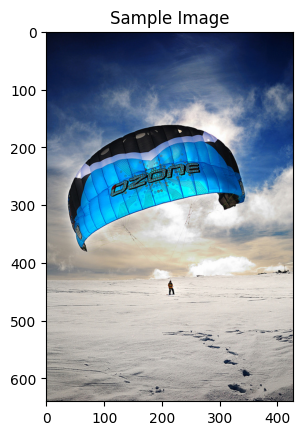

A white plate topped with a sandwich and french fries


In [ ]:
get_prediction()

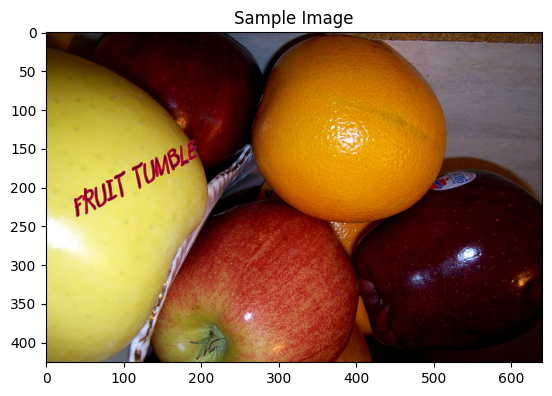

A person holding a baseball bat on a field


In [ ]:
get_prediction()

As the last task in this project, you will loop over the images until you find four image-caption pairs of interest:
- Two should include image-caption pairs that show instances when the model performed well.
- Two should highlight image-caption pairs that highlight instances where the model did not perform well.

Use the four code cells below to complete this task.

### The model performed well!

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively accurate captions.

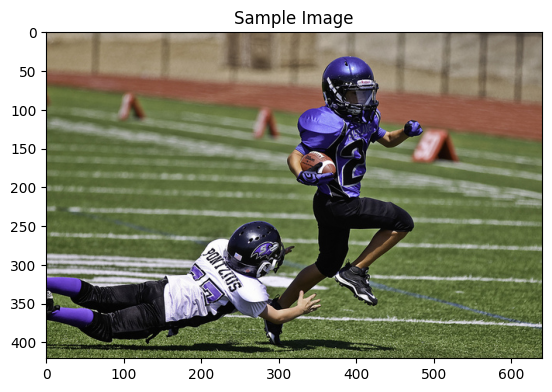

A person is holding a frisbee in his hand


In [ ]:
get_prediction()

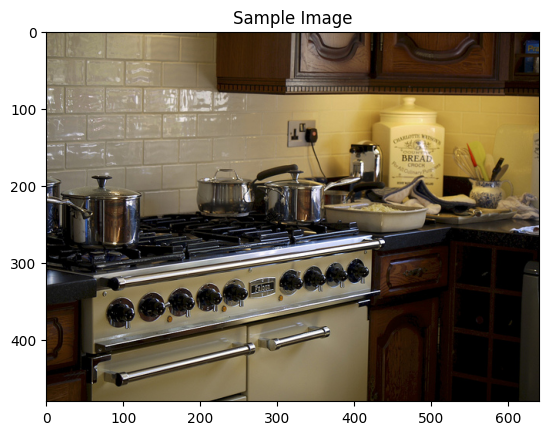

A large clock tower with a clock on it


In [ ]:
get_prediction()

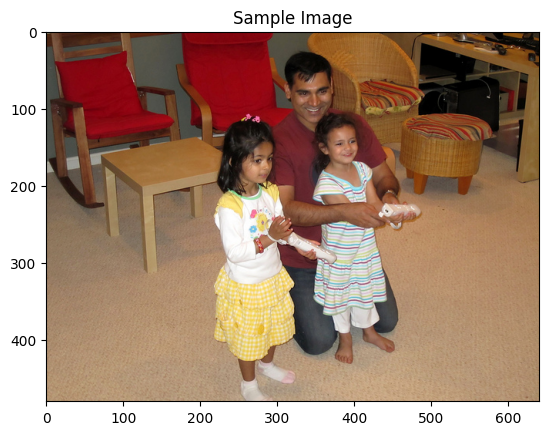

A man is standing on a tennis court holding a racquet


In [ ]:
get_prediction()

### The model could have performed better ...

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively inaccurate captions.

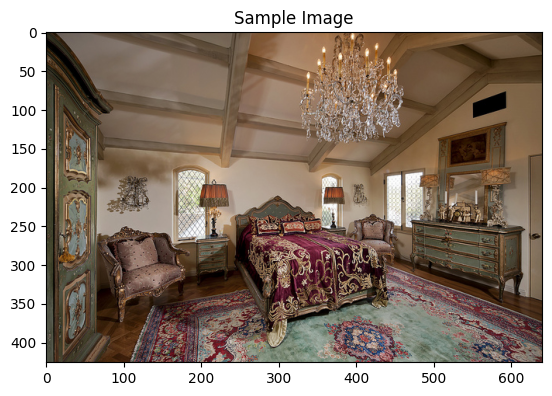

Riding on a motorcycle on a city street


In [ ]:
get_prediction()

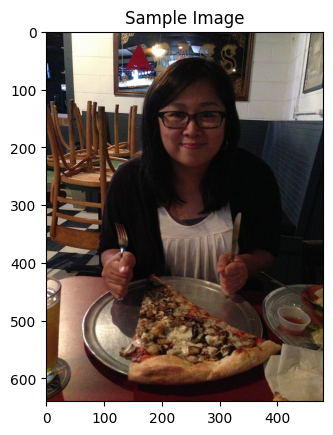

A person on a skateboard


In [ ]:
get_prediction()

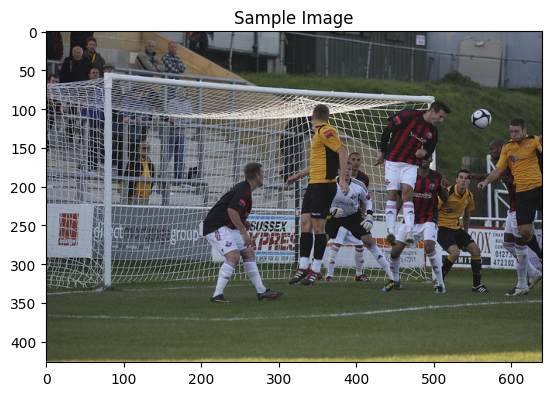

A large white and green cake on a table with a knife and fork


In [ ]:
get_prediction()